<a href="https://colab.research.google.com/github/atreGanesh15/Deep-Learning/blob/main/DL_ASS4_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment -NLP

**Course Name:** Deep Learning ( PEC )

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Ganesh Atre

**Student ID:** 202201040068

**Group Members**: 1. Anirudha Gapat   ;   2. Mayur Kapgate

**Dataset**: Amazon Fine Food Reviews Dataset

**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

# **Part 1: NLP Preprocessing**

**Step 1: Install & Import Required Libraries**

In [ ]:
# Install necessary libraries (if not already installed)
!pip install nltk spacy sklearn pandas numpy

# Import libraries
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk

# Download necessary NLTK resources
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stopwords for filtering
nltk.download('wordnet')  # Lemmatization
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('maxent_ne_chunker')  # Named Entity Recognition (NER)
nltk.download('words')  # Dictionary for NER
nltk.download('punkt_tab') # Download the punkt_tab resource
nltk.download('averaged_perceptron_tagger_eng') #download the english version of the tagger
nltk.download('maxent_ne_chunker_tab') # Download the correct tab resource for ne_chunker

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /roo

True

**Step 2: Download & Load the Amazon Fine Food Reviews Dataset**

In [ ]:
!pip install kaggle  # Install kaggle package if not already installed

# Upload your Kaggle API key file (first, download kaggle.json from your Kaggle account)
from google.colab import files
files.upload()

# Create a Kaggle directory and move the API key
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d snap/amazon-fine-food-reviews

# Unzip the dataset
!unzip amazon-fine-food-reviews.zip

# Load the dataset into a Pandas DataFrame
import pandas as pd
df = pd.read_csv("Reviews.csv")

# Display first few rows
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Step 3: Explore the Dataset**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns
df = df[['Text', 'Score']]  # Keep only relevant columns
df = df.dropna()  # Remove missing values

# Check data types
print(df.dtypes)

# Check label distribution
print(df['Score'].value_counts())

# Convert Score into binary sentiment (Positive: 4-5, Negative: 1-2, Neutral (3) ignored)
df = df[df['Score'] != 3]  # Remove neutral reviews
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)  # 1: Positive, 0: Negative
df.head()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64
Text     object
Score     int64
dtype: object
Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


**Step 4: Convert Text to Lowercase**

In [ ]:
df['Text'] = df['Text'].str.lower()
df.head()


,Text,Score,Sentiment
0,i have bought several of the vitality canned d...,5,1
1,product arrived labeled as jumbo salted peanut...,1,0
2,this is a confection that has been around a fe...,4,1
3,if you are looking for the secret ingredient i...,2,0
4,great taffy at a great price. there was a wid...,5,1


**Step 5: Tokenization**

In [ ]:
# Install NLTK
!pip install nltk

# Import NLTK and download required resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews
df['tokens'] = df['Text'].apply(word_tokenize)

# Display the tokenized reviews
df[['tokens', 'Text']].head()


,tokens,Text
0,"[i, have, bought, several, of, the, vitality, ...",i have bought several of the vitality canned d...
1,"[product, arrived, labeled, as, jumbo, salted,...",product arrived labeled as jumbo salted peanut...
2,"[this, is, a, confection, that, has, been, aro...",this is a confection that has been around a fe...
3,"[if, you, are, looking, for, the, secret, ingr...",if you are looking for the secret ingredient i...
4,"[great, taffy, at, a, great, price, ., there, ...",great taffy at a great price. there was a wid...


**Step 6: Stopwords Removal**

In [ ]:
# Define stopwords list
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()


,Text,Score,Sentiment,tokens,tokens_no_stopwords
0,i have bought several of the vitality canned d...,5,1,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,1,0,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,4,1,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, ., light, ,, p..."
3,if you are looking for the secret ingredient i...,2,0,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price. there was a wid...,5,1,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, ., wide, assortme..."


**Step 7: Stemming**

In [ ]:
stemmer = PorterStemmer()  # Use SnowballStemmer('english') if needed

df['stemmed'] = df['tokens_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()


,Text,Score,Sentiment,tokens,tokens_no_stopwords,stemmed
0,i have bought several of the vitality canned d...,5,1,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product..."
1,product arrived labeled as jumbo salted peanut...,1,0,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanut, ...."
2,this is a confection that has been around a fe...,4,1,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, ., light, ,, p...","[confect, around, centuri, ., light, ,, pillow..."
3,if you are looking for the secret ingredient i...,2,0,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo..."
4,great taffy at a great price. there was a wid...,5,1,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, ., wide, assortme...","[great, taffi, great, price, ., wide, assort, ..."


**Step 8: Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['tokens_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()


,Text,Score,Sentiment,tokens,tokens_no_stopwords,stemmed,lemmatized
0,i have bought several of the vitality canned d...,5,1,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product...","[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,1,0,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanut, ....","[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,4,1,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, ., light, ,, p...","[confect, around, centuri, ., light, ,, pillow...","[confection, around, century, ., light, ,, pil..."
3,if you are looking for the secret ingredient i...,2,0,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo...","[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price. there was a wid...,5,1,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, ., wide, assortme...","[great, taffi, great, price, ., wide, assort, ...","[great, taffy, great, price, ., wide, assortme..."


**Step 9: Vectorization Using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df['Text'])

# Convert to DataFrame
df_count_vectorized = pd.DataFrame(X_count.toarray(), columns=vectorizer.get_feature_names_out())
df_count_vectorized.head()


,00,000,0000,000001,00001,000013,0000soo,0001,000111052,0002251337,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,µg,çay,çaykur,çelem,être,île,ît
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Step 10: Vectorization Using TF-IDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Convert to DataFrame
df_tfidf_vectorized = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf_vectorized.head()


,00,000,0000,000001,00001,000013,0000soo,0001,000111052,0002251337,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,µg,çay,çaykur,çelem,être,île,ît
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Splitting the Data:**

**Step 1: Import Required Libraries**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2: Splitting the Data (80% Training, 20% Testing)**

In [ ]:
# Use TF-IDF Vectorized Data for Model Training
X = X_tfidf  # Feature matrix (TF-IDF transformed text)
y = df['Sentiment']  # Target labels (1 = Positive, 0 = Negative)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (420651, 115282)
Testing data shape: (105163, 115282)


**Step 3: Train a Classification Model (Logistic Regression / Naïve Bayes)**

Option 1: Using Naïve Bayes

In [ ]:
# Train a Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

Option 2: Using Logistic Regression

In [ ]:
# Train a Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

**Step 4: Model Evaluation**

In [ ]:
# Define a function to evaluate the model
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- Model Evaluation: {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

# Evaluate Naïve Bayes Model
evaluate_model(y_test, y_pred_nb, "Naïve Bayes")

# Evaluate Logistic Regression Model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


--- Model Evaluation: Naïve Bayes ---
Accuracy: 0.8620617517567966
Precision: 0.8607479358912093
Recall: 0.998085240583889
F1 Score: 0.9243431003369251

--- Model Evaluation: Logistic Regression ---
Accuracy: 0.9365080874452041
Precision: 0.9468894573559027
Recall: 0.9797486033519553
F1 Score: 0.9630388211393365


**Step 5: Confusion Matrix Visualization**

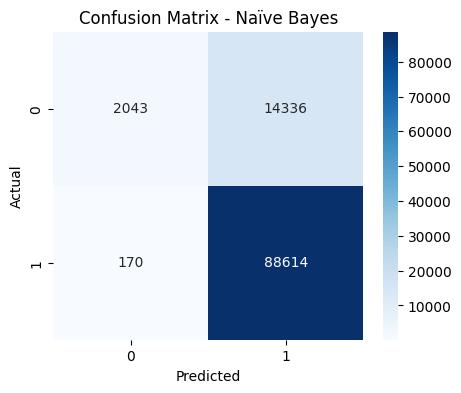

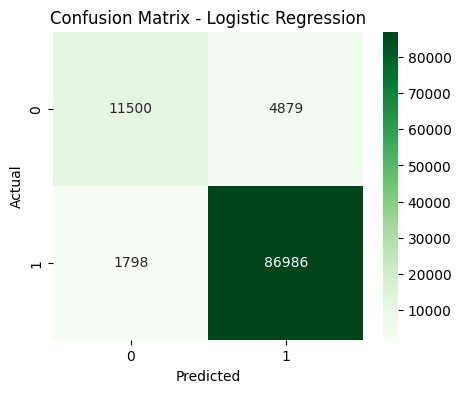

In [ ]:
# Plot Confusion Matrix for Naïve Bayes
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Conclusion of the AIML NLP Assignment** <br>
In this NLP classification task, text preprocessing played a crucial role in improving model performance by converting text to lowercase, removing stopwords, applying stemming and lemmatization, and using TF-IDF vectorization. Among the models tested, Naïve Bayes achieved an accuracy of 86.2% with exceptionally high recall (99.8%), making it suitable for applications where capturing all positive cases is critical. However, it had lower precision (86.1%), leading to more false positives. On the other hand, Logistic Regression outperformed Naïve Bayes with 93.7% accuracy, balanced precision (94.7%) and recall (97.9%), making it the best choice for sentiment classification. Overall, Logistic Regression provides the best trade-off between precision and recall. Future improvements can include hyperparameter tuning, exploring deep learning models like LSTMs or BERT, and using word embeddings for richer feature representations.

# **Task 5 : Declaration**

I Ganesh Atre, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:

Signature: Ganesh Atre